In [1]:
import pandas as pd
import numpy as np
import glob
import os
import re
import datetime
import matplotlib.pyplot as plt
from pylab import ylim

In [34]:
pathMode1First =r'../DataFromExperiment/Mode1First/participant*' # Mode 1 First
pathMode2First =r'../DataFromExperiment/Mode2First/participant*' # Mode 2 First

all_files1 = glob.glob(os.path.join(pathMode1First, "*.csv"))
all_files2 = glob.glob(os.path.join(pathMode2First, "*.csv"))

all_participants1 = {}
all_participants2 = {}

all_participants1_timePlaying = {}
all_participants2_timePlaying = {}

all_participants1_dataAnalysis = {}
all_participants2_dataAnalysis = {}

In [35]:
def loadFile(all_files, all_participants):
    for f in all_files:
        df = pd.read_csv(f, sep="\t")
        df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)
        #df = df.set_index("Time")
        participantId = os.path.dirname(f).split('/')[-1]
    
        if participantId not in all_participants:
            all_participants[participantId] = list()

        all_participants[participantId].append(df)

In [36]:
loadFile(all_files1, all_participants1)
loadFile(all_files2, all_participants2)

In [37]:
def timePlayed(participantId, participant, all_participants_timePlaying):
    timePlayingMode1 = list()
    timePlayingMode2 = list()

    for x in participant:
        if x['emotionModeActivated'].any():
            timePlayingMode2.append(np.max(x['Time']) - np.min(x['Time']))
        else:
            timePlayingMode1.append(np.max(x['Time']) - np.min(x['Time']))
    
    all_participants_timePlaying[participantId] = { 
        'Normal Mode': timePlayingMode1,
        'Emotion Mode': timePlayingMode2
    }

In [38]:
for key, value in all_participants1.items():
    timePlayed(key, value, all_participants1_timePlaying)

In [39]:
for key, value in all_participants2.items():
    timePlayed(key, value, all_participants2_timePlaying)

In [40]:
print "STARTED WITH NORMAL MODE"
for key, value in all_participants1_timePlaying.items():
    print "##### ", key, " #####"
    for tKey, tValue in value.items():  
        print tKey
        print "average: %f seconds" % (np.mean(tValue))
        print "max: %f seconds" % (np.max(tValue))
        print "min: %f seconds" % (np.min(tValue))
        print "sum: %.2f min" % (np.sum(tValue)/60)
        print "died per sec: %f" % (np.sum(tValue)/len(tValue))
        print "died: %d" % (len(tValue))
        print "\n"

STARTED WITH NORMAL MODE
#####  participant1  #####
Normal Mode
average: 25.591204 seconds
max: 68.486422 seconds
min: 4.924553 seconds
sum: 5.12 min
died per sec: 25.591204
died: 12


Emotion Mode
average: 16.134598 seconds
max: 43.365922 seconds
min: 4.530747 seconds
sum: 4.84 min
died per sec: 16.134598
died: 18


#####  participant2  #####
Normal Mode
average: 34.837714 seconds
max: 147.465825 seconds
min: 2.562098 seconds
sum: 16.26 min
died per sec: 34.837714
died: 28


Emotion Mode
average: 48.214224 seconds
max: 163.375342 seconds
min: 5.131754 seconds
sum: 14.46 min
died per sec: 48.214224
died: 18


#####  participant7  #####
Normal Mode
average: 71.432038 seconds
max: 202.647768 seconds
min: 5.394646 seconds
sum: 11.91 min
died per sec: 71.432038
died: 10


Emotion Mode
average: 100.765774 seconds
max: 297.763782 seconds
min: 6.370687 seconds
sum: 13.44 min
died per sec: 100.765774
died: 8


#####  participant6  #####
Normal Mode
average: 92.929802 seconds
max: 242.658428 se

In [41]:
print "STARTED WITH EMOTION MODE"
for key, value in all_participants2_timePlaying.items():
    print "##### ", key, " #####"
    for tKey, tValue in value.items():   
        print tKey
        print "average: %f seconds" % (np.mean(tValue))
        print "max: %f seconds" % (np.max(tValue))
        print "min: %f seconds" % (np.min(tValue))
        print "sum: %.2f sec" % (np.sum(tValue))
        print "died: %d" % (len(tValue))
        print "died per sec: %f" % (np.sum(tValue)/len(tValue))
        print "died per sec (minus max value): %f\n" % ((np.sum(tValue)-np.max(tValue))/(len(tValue)-1))

STARTED WITH EMOTION MODE
#####  participant8  #####
Normal Mode
average: 65.345630 seconds
max: 159.752983 seconds
min: 9.344158 seconds
sum: 392.07 sec
died: 6
died per sec: 65.345630
died per sec (minus max value): 46.464159

Emotion Mode
average: 118.895970 seconds
max: 281.238603 seconds
min: 6.832136 seconds
sum: 475.58 sec
died: 4
died per sec: 118.895970
died per sec (minus max value): 64.781758

#####  participant3  #####
Normal Mode
average: 26.607738 seconds
max: 93.189824 seconds
min: 3.718231 seconds
sum: 638.59 sec
died: 24
died per sec: 26.607738
died per sec (minus max value): 23.712865

Emotion Mode
average: 39.134048 seconds
max: 107.287883 seconds
min: 5.756562 seconds
sum: 469.61 sec
died: 12
died per sec: 39.134048
died per sec (minus max value): 32.938245

#####  participant5  #####
Normal Mode
average: 40.020421 seconds
max: 147.570380 seconds
min: 1.414466 seconds
sum: 840.43 sec
died: 21
died per sec: 40.020421
died per sec (minus max value): 34.642923

Emotion

In [42]:
combined_timePlaying = {}

for key, value in all_participants1_timePlaying.items():
    for tKey, tValue in value.items():
        if tKey not in combined_timePlaying:
            combined_timePlaying[tKey] = {
                "timePlaying": list(),
                "sumTimePlaying": list(),
                "died": list()
            }

        combined_timePlaying[tKey]['timePlaying'] += tValue
        combined_timePlaying[tKey]['sumTimePlaying'].append(np.sum(tValue))
        combined_timePlaying[tKey]['died'].append(len(tValue))

In [43]:
for key, value in all_participants2_timePlaying.items():
    for tKey, tValue in value.items():
        combined_timePlaying[tKey]['timePlaying'] += tValue
        combined_timePlaying[tKey]['sumTimePlaying'].append(np.sum(tValue))
        combined_timePlaying[tKey]['died'].append(len(tValue))

In [69]:
print "COMBINED FOR ALL PARTICIPANTS"
for key, value in combined_timePlaying.items():
    print key
    print "average: %f seconds" % (np.mean(value['timePlaying']))
    print "max: %f seconds" % (np.max(value['timePlaying']))
    print "min: %f seconds" % (np.min(value['timePlaying']))
    print "average sum: %f" % (np.mean(value['sumTimePlaying']))
    print "total sum: %f " % (np.sum(value['timePlaying']))
    print "average died: %d" % (np.mean(value['died']))
    print np.min(value['sumTimePlaying'])
    print "\n"

COMBINED FOR ALL PARTICIPANTS
Normal Mode
average: 34.760595 seconds
max: 242.658428 seconds
min: 1.414466 seconds
average sum: 647.416084
total sum: 5179.328674 
average died: 18
307.094451


Emotion Mode
average: 43.838665 seconds
max: 297.763782 seconds
min: 1.199357 seconds
average sum: 608.261481
total sum: 4866.091845 
average died: 13
290.422759




In [45]:
def gatherData(participantId, participant, all_participants_dataAnalysis):
    listMode1 = {
        "valence": {
            "allValence": list(),
            "max": list(),
            "min": list(),
            "average": list()
        },
        "game": {
            "allLevel": list(),
            "level": list(),
            "levelCount": list(),
            "hazardCount": list(),
            "highscore": list()
        }
    }
    listMode2 = {
        "valence": {
            "allValence": list(),
            "max": list(),
            "min": list(),
            "average": list()
        },
        "game": {
            "allLevel": list(),
            "level": list(),
            "levelCount": list(),
            "hazardCount": list(),
            "highscore": list()
        }
    }

    for x in participant:
        if x['emotionModeActivated'].any():
            
            valenceList = []
            for inIndex, inVal in enumerate(x['Attention']):
                if inVal > 70:        
                    valenceList.append(x['Valence'][inIndex])
            
            listMode2['valence']['allValence'].append( valenceList )
            listMode2['valence']['average'].append( np.mean(valenceList) )
            listMode2['valence']['min'].append( np.min(valenceList) )
            listMode2['valence']['max'].append( np.max(valenceList) )
            listMode2['game']['allLevel'].append( x['level'] )
            listMode2['game']['level'].append( np.max(x['level']) )
            listMode2['game']['levelCount'].append( np.max(x['level']) - np.min(x['level']) )
            listMode2['game']['hazardCount'].append( np.max(x['hazardCount']) )
            listMode2['game']['highscore'].append( np.max(x['score']) )
        else:
            valenceList = []
            for inIndex, inVal in enumerate(x['Attention']):
                if inVal > 70:        
                    valenceList.append(x['Valence'][inIndex])
            listMode1['valence']['allValence'].append( valenceList )
            listMode1['valence']['average'].append( np.mean(valenceList) )
            listMode1['valence']['min'].append( np.min(valenceList) )
            listMode1['valence']['max'].append( np.max(valenceList) )
            listMode1['game']['allLevel'].append( x['level'] )
            listMode1['game']['level'].append( np.max(x['level']) )
            listMode1['game']['levelCount'].append( np.max(x['level']) - np.min(x['level']) )
            listMode1['game']['hazardCount'].append( np.max(x['hazardCount']) )
            listMode1['game']['highscore'].append( np.max(x['score']) )
    
    all_participants_dataAnalysis[participantId] = { 
        'Normal Mode': listMode1,
        'Emotion Mode': listMode2
    }

In [46]:
for key, value in all_participants1.items():
    gatherData(key, value, all_participants1_dataAnalysis)

In [47]:
for key, value in all_participants2.items():
    gatherData(key, value, all_participants2_dataAnalysis)

In [48]:
print "STARTED WITH NORMAL MODE"
for key, value in all_participants1_dataAnalysis.items():
    guestMostLikedGame = {
        'game': "",
        'valence': None
    }
    print "##### ", key, " #####"
    for tKey, tValue in value.items():
        if guestMostLikedGame['valence'] == None or guestMostLikedGame['valence'] < np.mean(tValue['valence']['average']):
            guestMostLikedGame['valence'] = np.mean(tValue['valence']['average'])
            guestMostLikedGame['game'] = tKey 
        print "-", tKey, "-"
        print "-- Valence"
        print "---- average: %f" % (np.mean(tValue['valence']['average']))
        print "---- STD: %f" % (np.std(tValue['valence']['average']))
        print "---- max: %f" % (np.max(tValue['valence']['max']))
        print "---- min: %f" % (np.min(tValue['valence']['min']))
        print "-- Game"
        print "---- level: %d" % (np.max(tValue['game']['level']))
        print "---- level count: %d" % (np.max(tValue['game']['levelCount']))
        print "---- hazardCount: %d" % (np.max(tValue['game']['hazardCount']))
        print "---- highscore: %d" % (np.max(tValue['game']['highscore']))
        print "\n"
        
    print "Guess: %s (valence %f)\n\n" % (guestMostLikedGame['game'], guestMostLikedGame['valence'])

STARTED WITH NORMAL MODE
#####  participant1  #####
- Normal Mode -
-- Valence
---- average: 1.531117
---- STD: 3.429442
---- max: 99.622000
---- min: -6.369000
-- Game
---- level: 5
---- level count: 3
---- hazardCount: 30
---- highscore: 320


- Emotion Mode -
-- Valence
---- average: -0.003587
---- STD: 0.177302
---- max: 59.737000
---- min: -10.524000
-- Game
---- level: 6
---- level count: 2
---- hazardCount: 35
---- highscore: 210


Guess: Normal Mode (valence 1.531117)


#####  participant2  #####
- Normal Mode -
-- Valence
---- average: -7.891570
---- STD: 6.800069
---- max: 0.000000
---- min: -97.025000
-- Game
---- level: 8
---- level count: 4
---- hazardCount: 45
---- highscore: 1620


- Emotion Mode -
-- Valence
---- average: -11.960765
---- STD: 14.908855
---- max: 0.055000
---- min: -99.997000
-- Game
---- level: 14
---- level count: 5
---- hazardCount: 75
---- highscore: 2390


Guess: Normal Mode (valence -7.891570)


#####  participant7  #####
- Normal Mode -
-- Valence

In [49]:
print "STARTED WITH EMOTION MODE"
for key, value in all_participants2_dataAnalysis.items():
    guestMostLikedGame = {
        'game': "",
        'valence': None
    }
    print "##### ", key, " #####"
    for tKey, tValue in value.items():
        if guestMostLikedGame['valence'] == None or guestMostLikedGame['valence'] < np.mean(tValue['valence']['average']):
            guestMostLikedGame['valence'] = np.mean(tValue['valence']['average'])
            guestMostLikedGame['game'] = tKey 
        print "-", tKey, "-"
        print "-- Valence"
        print "---- average: %f" % (np.mean(tValue['valence']['average']))
        print "---- STD: %f" % (np.std(tValue['valence']['average']))
        print "---- max: %f" % (np.max(tValue['valence']['max']))
        print "---- min: %f" % (np.min(tValue['valence']['min']))
        print "-- Game"
        print "---- level: %d" % (np.max(tValue['game']['level']))
        print "---- levels played in total: %d" % (len(tValue['game']['allLevel']))
        print "---- level count: %d" % (np.max(tValue['game']['levelCount']))
        print "---- hazardCount: %d" % (np.max(tValue['game']['hazardCount']))
        print "---- highscore: %d" % (np.max(tValue['game']['highscore']))
        print "\n"
    print "Guess: %s (valence %f)\n\n" % (guestMostLikedGame['game'], guestMostLikedGame['valence'])

STARTED WITH EMOTION MODE
#####  participant8  #####
- Normal Mode -
-- Valence
---- average: -3.377783
---- STD: 2.570786
---- max: 19.325000
---- min: -98.495000
-- Game
---- level: 10
---- levels played in total: 6
---- level count: 5
---- hazardCount: 55
---- highscore: 2180


- Emotion Mode -
-- Valence
---- average: -2.095259
---- STD: 1.637852
---- max: 99.255000
---- min: -99.996000
-- Game
---- level: 14
---- levels played in total: 4
---- level count: 10
---- hazardCount: 75
---- highscore: 3670


Guess: Emotion Mode (valence -2.095259)


#####  participant3  #####
- Normal Mode -
-- Valence
---- average: 0.059973
---- STD: 0.564925
---- max: 99.856000
---- min: -15.847000
-- Game
---- level: 6
---- levels played in total: 24
---- level count: 4
---- hazardCount: 35
---- highscore: 1120


- Emotion Mode -
-- Valence
---- average: 0.563675
---- STD: 1.580798
---- max: 99.767000
---- min: -31.059000
-- Game
---- level: 13
---- levels played in total: 12
---- level count: 3
----

In [50]:
combined_dataAnalysis = {}

for key, value in all_participants1_dataAnalysis.items():
    for tKey, tValue in value.items():
        if tKey not in combined_dataAnalysis:
            combined_dataAnalysis[tKey] = {
                "allAttention": list(),
                "valence": {
                    "allValence": list(),
                    "max": list(),
                    "min": list(),
                    "average": list()
                },
                "game": {
                    "level": list(),
                    "levelCount": list(),
                    "hazardCount": list(),
                    "highscore": list()
                }
            }

        combined_dataAnalysis[tKey]['valence']['allValence'] += tValue['valence']['allValence']
        combined_dataAnalysis[tKey]['valence']['average'] += tValue['valence']['average']
        combined_dataAnalysis[tKey]['valence']['min'] += tValue['valence']['min']
        combined_dataAnalysis[tKey]['valence']['max'] += tValue['valence']['max']
        combined_dataAnalysis[tKey]['game']['level'] += tValue['game']['level']
        combined_dataAnalysis[tKey]['game']['levelCount'] += tValue['game']['levelCount']
        combined_dataAnalysis[tKey]['game']['hazardCount'] += tValue['game']['hazardCount']
        combined_dataAnalysis[tKey]['game']['highscore'] += tValue['game']['highscore']

In [51]:
for key, value in all_participants2_dataAnalysis.items():
    for tKey, tValue in value.items():
        combined_dataAnalysis[tKey]['valence']['allValence'] += tValue['valence']['allValence']
        combined_dataAnalysis[tKey]['valence']['average'] += tValue['valence']['average']
        combined_dataAnalysis[tKey]['valence']['min'] += tValue['valence']['min']
        combined_dataAnalysis[tKey]['valence']['max'] += tValue['valence']['max']
        combined_dataAnalysis[tKey]['game']['level'] += tValue['game']['level']
        combined_dataAnalysis[tKey]['game']['levelCount'] += tValue['game']['levelCount']
        combined_dataAnalysis[tKey]['game']['hazardCount'] += tValue['game']['hazardCount']
        combined_dataAnalysis[tKey]['game']['highscore'] += tValue['game']['highscore']

In [52]:
print "COMBINED FOR ALL PARTICIPANTS DATA ANALYSIS"
for key, value in combined_dataAnalysis.items():
    print "##### ", key, " #####"
    print "-- Valence"
    print "---- average: %f" % (np.mean(value['valence']['average']))
    print "---- STD: %f" % (np.std(value['valence']['average']))
    print "---- max: %f" % (np.max(value['valence']['max']))
    print "---- min: %f" % (np.min(value['valence']['min']))
    print "-- Game"
    print "---- level: %d" % (np.max(value['game']['level']))
    print "---- level count: %d" % (np.max(value['game']['levelCount']))
    print "---- hazardCount: %d" % (np.max(value['game']['hazardCount']))
    print "---- highscore: %d" % (np.max(value['game']['highscore']))
    print "\n"

COMBINED FOR ALL PARTICIPANTS DATA ANALYSIS
#####  Normal Mode  #####
-- Valence
---- average: -2.671951
---- STD: 8.162241
---- max: 99.944000
---- min: -99.977000
-- Game
---- level: 13
---- level count: 7
---- hazardCount: 70
---- highscore: 2750


#####  Emotion Mode  #####
-- Valence
---- average: -2.171929
---- STD: 7.932124
---- max: 99.984000
---- min: -99.997000
-- Game
---- level: 18
---- level count: 10
---- hazardCount: 95
---- highscore: 4340




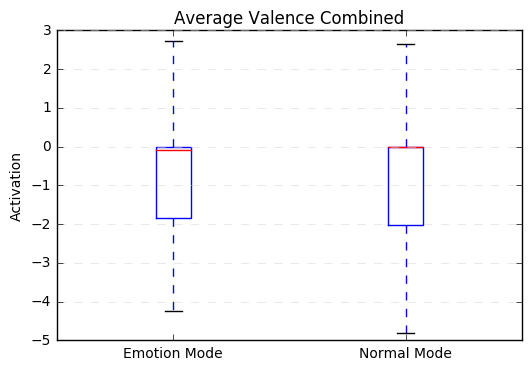

In [53]:
data1 = np.array(combined_dataAnalysis['Emotion Mode']['valence']['average'])
data2 = np.array(combined_dataAnalysis['Normal Mode']['valence']['average'])
data = [data1, data2]
plt.boxplot(data, 0, '')
plt.xticks([1, 2], ['Emotion Mode', 'Normal Mode'])
plt.title('Average Valence Combined')  # plot title
plt.grid(axis='y',          # set y-axis grid lines
        linestyle='--',     # use dashed lines
        which='major',      # only major ticks
        color='lightgrey',  # line colour
        alpha=0.7)          # make lines semi-translucent
plt.ylabel("Activation")
plt.show()

In [54]:
participantBoxEmotion = []
participantBoxNormal = []

for key, value in all_participants1_dataAnalysis.items():
    for tKey, tValue in value.items():
        if tKey == "Emotion Mode":
            participantBoxEmotion.append(tValue['valence']['average'])
        else:
            participantBoxNormal.append(tValue['valence']['average'])

for key, value in all_participants2_dataAnalysis.items():
    for tKey, tValue in value.items():
        if tKey == "Emotion Mode":
            participantBoxEmotion.append(tValue['valence']['average'])
        else:
            participantBoxNormal.append(tValue['valence']['average'])

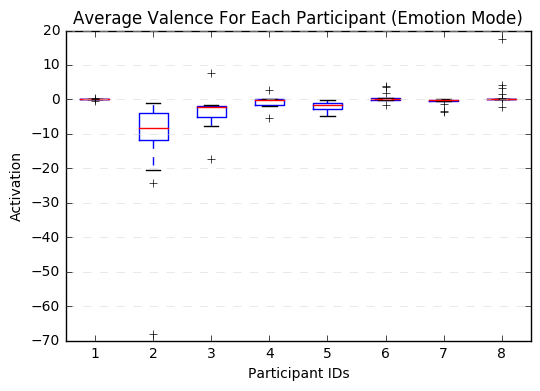

In [55]:
plt.boxplot(participantBoxEmotion, 0)
plt.title('Average Valence For Each Participant (Emotion Mode)')  # plot title
plt.grid(axis='y',          # set y-axis grid lines
        linestyle='--',     # use dashed lines
        which='major',      # only major ticks
        color='lightgrey',  # line colour
        alpha=0.7)          # make lines semi-translucent
plt.ylabel("Activation")
plt.xlabel("Participant IDs")
plt.show()

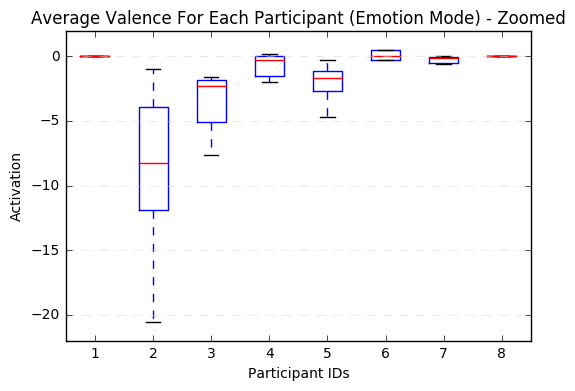

In [56]:
plt.boxplot(participantBoxEmotion, 0, "")
plt.title('Average Valence For Each Participant (Emotion Mode) - Zoomed')  # plot title
plt.grid(axis='y',          # set y-axis grid lines
        linestyle='--',     # use dashed lines
        which='major',      # only major ticks
        color='lightgrey',  # line colour
        alpha=0.7)          # make lines semi-translucent
plt.ylabel("Activation")
plt.xlabel("Participant IDs")
plt.ylim(-22,2)
plt.show()

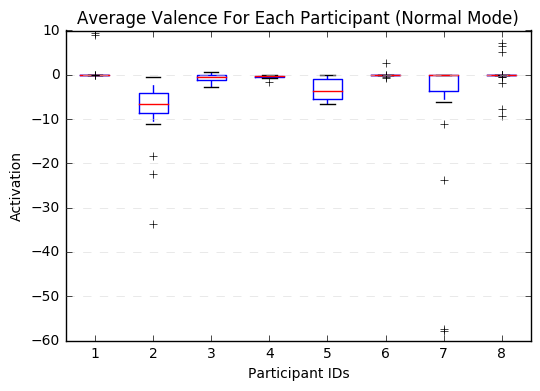

In [57]:
plt.boxplot(participantBoxNormal, 0)
plt.title('Average Valence For Each Participant (Normal Mode)')  # plot title
plt.grid(axis='y',          # set y-axis grid lines
        linestyle='--',     # use dashed lines
        which='major',      # only major ticks
        color='lightgrey',  # line colour
        alpha=0.7)          # make lines semi-translucent
plt.ylabel("Activation")
plt.xlabel("Participant IDs")
plt.show()

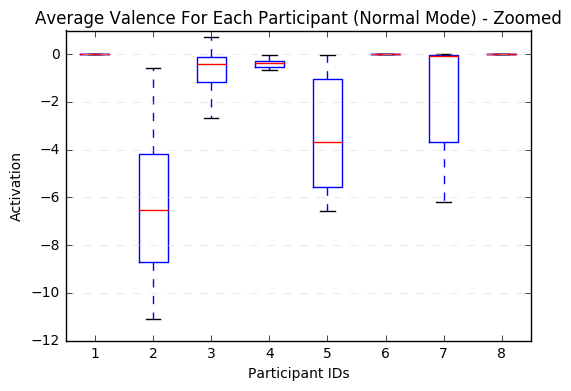

In [58]:
plt.boxplot(participantBoxNormal, 0, "")
plt.title('Average Valence For Each Participant (Normal Mode) - Zoomed')  # plot title
plt.grid(axis='y',          # set y-axis grid lines
        linestyle='--',     # use dashed lines
        which='major',      # only major ticks
        color='lightgrey',  # line colour
        alpha=0.7)          # make lines semi-translucent
plt.ylabel("Activation")
plt.xlabel("Participant IDs")
plt.ylim(-12,1)
plt.show()

In [59]:
allLevelDown1 = {}
for participantId, participant in all_participants1_dataAnalysis.items():
    allLevelDown1[participantId] = {
        'levelDownNormal': 0,
        'levelDownEmotion': 0
    }
    
    LevelDown = 0
    for allLvl in participant['Normal Mode']['game']['allLevel']:
        lastLevel = None
        for lvl in allLvl:
            if lastLevel == None:
                lastLevel = lvl

            if lvl < lastLevel:
                LevelDown += 1

            lastLevel = lvl   
    allLevelDown1[participantId]['levelDownNormal'] = LevelDown
    
    LevelDown = 0
    for allLvl in participant['Emotion Mode']['game']['allLevel']:
        lastLevel = None
        for lvl in allLvl:
            if lastLevel == None:
                lastLevel = lvl

            if lvl < lastLevel:
                LevelDown += 1

            lastLevel = lvl    
    allLevelDown1[participantId]['levelDownEmotion'] = LevelDown

In [60]:
allLevelDown2 = {}
for participantId, participant in all_participants2_dataAnalysis.items():
    allLevelDown2[participantId] = {
        'levelDownNormal': 0,
        'levelDownEmotion': 0
    }
    
    LevelDown = 0
    for allLvl in participant['Normal Mode']['game']['allLevel']:
        lastLevel = None
        for lvl in allLvl:
            if lastLevel == None:
                lastLevel = lvl

            if lvl < lastLevel:
                LevelDown += 1

            lastLevel = lvl   
    allLevelDown2[participantId]['levelDownNormal'] = LevelDown
    
    LevelDown = 0
    for allLvl in participant['Emotion Mode']['game']['allLevel']:
        lastLevel = None
        for lvl in allLvl:
            if lastLevel == None:
                lastLevel = lvl

            if lvl < lastLevel:
                LevelDown += 1

            lastLevel = lvl    
    allLevelDown2[participantId]['levelDownEmotion'] = LevelDown

In [61]:
allLevelDown1

{'participant1': {'levelDownEmotion': 0, 'levelDownNormal': 7},
 'participant2': {'levelDownEmotion': 3, 'levelDownNormal': 27},
 'participant6': {'levelDownEmotion': 0, 'levelDownNormal': 5},
 'participant7': {'levelDownEmotion': 1, 'levelDownNormal': 9}}

In [62]:
allLevelDown2

{'participant3': {'levelDownEmotion': 0, 'levelDownNormal': 22},
 'participant4': {'levelDownEmotion': 1, 'levelDownNormal': 15},
 'participant5': {'levelDownEmotion': 0, 'levelDownNormal': 18},
 'participant8': {'levelDownEmotion': 0, 'levelDownNormal': 4}}

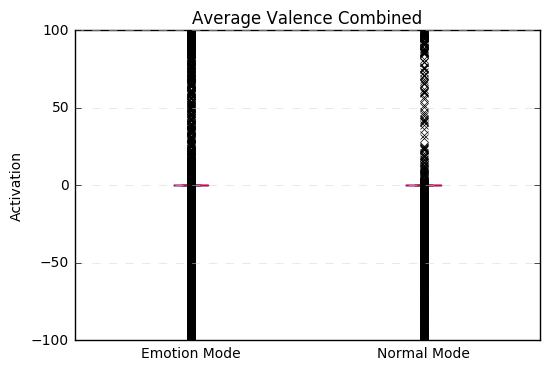

In [66]:
data1 = np.concatenate(combined_dataAnalysis['Emotion Mode']['valence']['allValence'])
data2 = np.concatenate(combined_dataAnalysis['Normal Mode']['valence']['allValence'])
data = [data1, data2]
plt.boxplot(data, 0, 'x')
plt.xticks([1, 2], ['Emotion Mode', 'Normal Mode'])
plt.title('Average Valence Combined')  # plot title
plt.grid(axis='y',          # set y-axis grid lines
        linestyle='--',     # use dashed lines
        which='major',      # only major ticks
        color='lightgrey',  # line colour
        alpha=0.7)          # make lines semi-translucent
plt.ylabel("Activation")
plt.show()

In [67]:
print np.mean(data1)
print np.mean(data2)
print len(data1)
print len(data2)

-1.84548693256
-2.38493407375
63861
67530


In [68]:
print np.mean(data1)
print np.mean(data2)
print len(data1)
print len(data2)

-1.84548693256
-2.38493407375
63861
67530


In [65]:
print np.mean(combined_dataAnalysis['Emotion Mode']['valence']['average'])

-2.17192891241
